In [1]:
import pandas
import collections
import numpy

In [109]:
# https://www.kaggle.com/ronitf/heart-disease-uci
df = pandas.read_csv("heart.csv")
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Age

In [110]:
age_frame = pandas.DataFrame(df.groupby("age").size().reset_index())
age_frame = age_frame.rename(columns={"age": "age", 0: "amount"})
age_frame

,age,amount
0,29,1
1,34,2
2,35,4
3,37,2
4,38,3
5,39,4
6,40,3
7,41,10
8,42,8
9,43,8


58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

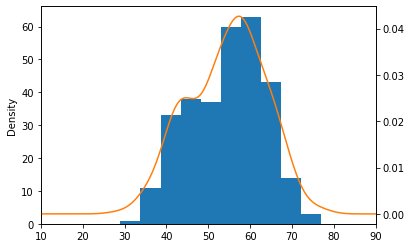

In [166]:

ax = df["age"].plot(kind='hist')
plt = df["age"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(10, 90)
df["age"].value_counts().nlargest(10)



## Sex

1    207
0     96
Name: sex, dtype: int64

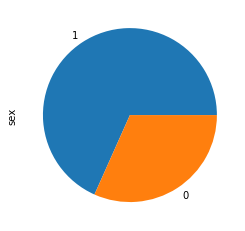

In [123]:
df["sex"].value_counts().plot(kind='pie')
df["sex"].value_counts()

## chest pain type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

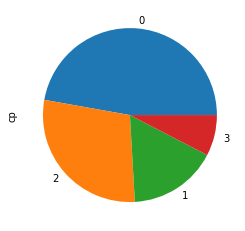

In [124]:
df["cp"].value_counts().plot(kind='pie')
df["cp"].astype('category').value_counts()

## resting blood pressure 

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
Name: trestbps, dtype: int64

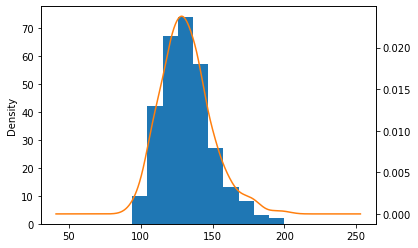

In [168]:
ax = df["trestbps"].plot(kind='hist')
plt = df["trestbps"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(50, 250)
df["trestbps"].astype('int').value_counts().nlargest(10)

## chol

234    6
204    6
197    6
269    5
212    5
254    5
226    4
243    4
240    4
239    4
Name: chol, dtype: int64

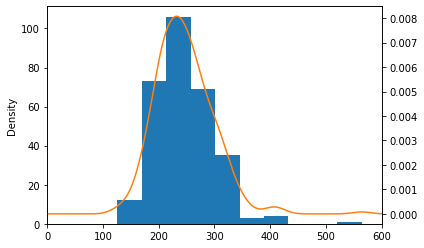

In [185]:
ax = df["chol"].plot(kind='hist')
plt = df["chol"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(0, 600)
df["chol"].astype('int').value_counts().nlargest(10)

## fasting blood sugar > 120 mg/dl

0    258
1     45
Name: fbs, dtype: int64

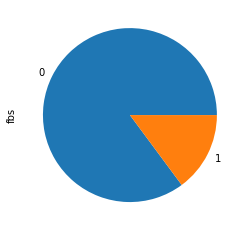

In [169]:
df["fbs"].value_counts().plot(kind='pie')
df["fbs"].value_counts()

## restecg

1    152
0    147
2      4
Name: restecg, dtype: int64

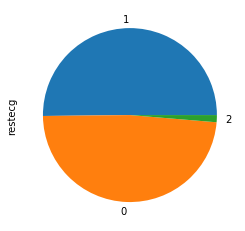

In [171]:
df["restecg"].value_counts().plot(kind='pie')
df["restecg"].astype('category').value_counts()

## maximum heart rate achieved 

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
Name: thalach, dtype: int64

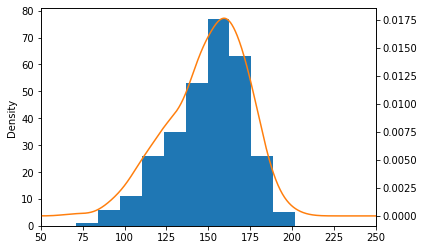

In [186]:
ax = df["thalach"].plot(kind='hist')
plt = df["thalach"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(50, 250)
df["thalach"].astype('int').value_counts().nlargest(10)

In [175]:
## exercise induced angina 

0    204
1     99
Name: exang, dtype: int64

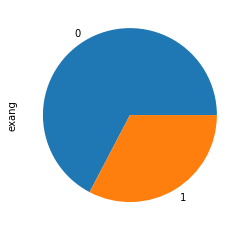

In [176]:
df["exang"].value_counts().plot(kind='pie')
df["exang"].value_counts()

In [183]:
## oldpeak

0    166
1     78
2     34
3     17
4      6
6      1
5      1
Name: oldpeak, dtype: int64

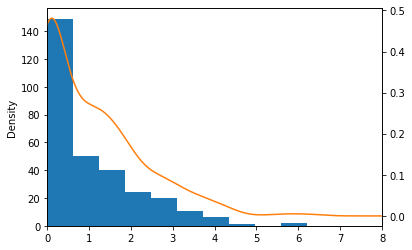

In [187]:
ax = df["oldpeak"].plot(kind='hist')
plt = df["oldpeak"].plot(kind='kde', ax=ax, secondary_y=True)
plt.set_xlim(0, 8)
df["oldpeak"].astype('int').value_counts().nlargest(10)

## the slope of the peak exercise ST segment

2    142
1    140
0     21
Name: slope, dtype: int64

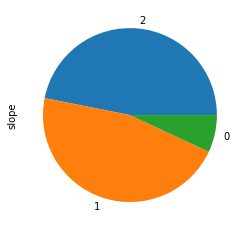

In [189]:
df["slope"].value_counts().plot(kind='pie')
df["slope"].astype('category').value_counts()

In [190]:
## ca

0.0    175
1.0     65
2.0     38
3.0     20
4.0      5
Name: ca, dtype: int64

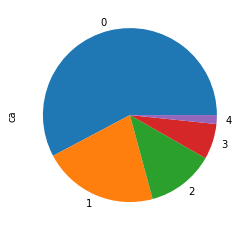

In [191]:
df["ca"].value_counts().plot(kind='pie')
df["ca"].astype('float').value_counts()